In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
import cv2

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [9]:
CW_DATASET_PATH = "CW_dataset"

def load_data(dataset_path=CW_DATASET_PATH):
    x_train_all_path = os.path.join(dataset_path, "x_train_all.csv")
    y_train_all_path = os.path.join(dataset_path, "y_train_all.csv")
    x_test_all_path = os.path.join(dataset_path, "x_test_all.csv")
    y_test_all_path = os.path.join(dataset_path, "y_test_all.csv")

    x_train_all = pd.read_csv(x_train_all_path)
    y_train_all = pd.read_csv(y_train_all_path)
    x_test_all = pd.read_csv(x_test_all_path)
    y_test_all = pd.read_csv(y_test_all_path)

    return x_train_all, y_train_all,x_test_all,y_test_all

In [10]:
x_train, y_train,x_test, y_test = load_data()

In [11]:
x_train.shape

(9690, 2304)

In [12]:
y_train.shape

(9690, 1)

In [13]:
x_test.shape

(3090, 2304)

In [14]:
y_train = y_train.values.ravel()

# Decision Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

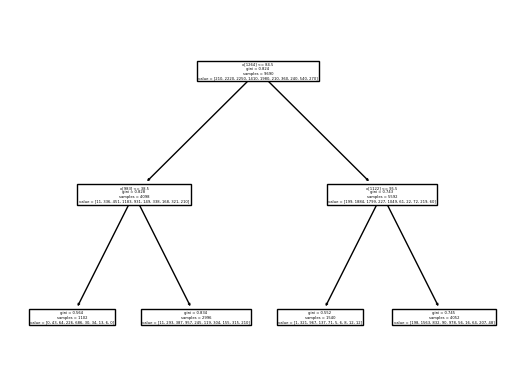

In [25]:
plot_tree(tree_clf);

# Evaluation Metrics

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

y_train_pred = tree_clf.predict(x_train)
accuracy_training = accuracy_score(y_train, y_train_pred)
# confusion_matrix_training = confusion_matrix(y_train, y_train_pred)
classification_report_training = classification_report(y_train, y_train_pred, zero_division=1)

cross_val_scores = cross_val_score(tree_clf, x_train, y_train, cv=10, scoring='accuracy')

# roc_auc = roc_auc_score(y_train, y_train_proba)
print("Accuracy on the training set:", accuracy_training)
# print("Confusion Matrix on the training set:\n", confusion_matrix_training)
print("Classification Report on the training set:\n", classification_report_training)
print("Accuracy using 10-fold cross-validation:", cross_val_scores.mean())

#print("roc_auc:", roc_auc)

Accuracy on the training set: 0.4306501547987616
Classification Report on the training set:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       210
           1       0.39      0.70      0.50      2220
           2       0.63      0.43      0.51      2250
           3       0.32      0.68      0.43      1410
           4       0.62      0.35      0.45      1980
           5       1.00      0.00      0.00       210
           6       1.00      0.00      0.00       360
           7       1.00      0.00      0.00       240
           8       1.00      0.00      0.00       540
           9       1.00      0.00      0.00       270

    accuracy                           0.43      9690
   macro avg       0.80      0.22      0.19      9690
weighted avg       0.60      0.43      0.39      9690

Accuracy using 10-fold cross-validation: 0.41413828689370485


In [27]:

y_test_pred = tree_clf.predict(x_test)
accuracy_training = accuracy_score(y_test, y_test_pred)
# confusion_matrix_training = confusion_matrix(y_train, y_train_pred)
classification_report_training = classification_report(y_test, y_test_pred, zero_division=1)

cross_val_scores = cross_val_score(tree_clf, x_test, y_test, cv=10, scoring='accuracy')

# roc_auc = roc_auc_score(y_train, y_train_proba)
print("Accuracy on the training set:", accuracy_training)
# print("Confusion Matrix on the training set:\n", confusion_matrix_training)
print("Classification Report on the training set:\n", classification_report_training)
print("Accuracy using 10-fold cross-validation:", cross_val_scores.mean())

Accuracy on the training set: 0.4815533980582524
Classification Report on the training set:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        60
           1       0.44      0.76      0.56       720
           2       0.62      0.44      0.51       750
           3       0.32      0.63      0.42       450
           4       0.75      0.50      0.60       660
           5       1.00      0.00      0.00        60
           6       1.00      0.00      0.00        90
           7       1.00      0.00      0.00        60
           8       1.00      0.00      0.00       150
           9       1.00      0.00      0.00        90

    accuracy                           0.48      3090
   macro avg       0.81      0.23      0.21      3090
weighted avg       0.63      0.48      0.44      3090

Accuracy using 10-fold cross-validation: 0.47443365695792883


# Finding Optimal Hyperparameters Using Randomized Search 

In [28]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

# Define the parameter distributions to sample from
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': scipy.stats.randint(1, 100),
    'min_samples_split': scipy.stats.randint(2, 20),
    'min_samples_leaf': scipy.stats.randint(1, 10)
}

# Create the Decision Tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Perform Random Search with cross-validation
random_search = RandomizedSearchCV(tree_clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the random search to your data
random_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_tree_clf = random_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 74, 'min_samples_leaf': 4, 'min_samples_split': 15} DecisionTreeClassifier(criterion='entropy', max_depth=74, min_samples_leaf=4,
                       min_samples_split=15, random_state=42)


In [29]:
best_tree_clf

DecisionTreeClassifier(criterion='entropy', max_depth=74, min_samples_leaf=4,
                       min_samples_split=15, random_state=42)

In [ ]:

y_pred = best_tree_clf.predict(x_test)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on the test set (Random Search):", accuracy)


Accuracy on the test set (Random Search): 0.7936666666666666


# Results

# Tree 1

# Tree 2

# Tree 3